
# Primer Entrega Comisión 84930 Florencia Lascombes Migliardi

## Descripción del tema elegido

El dataset elegido fue uno de Netflix que tiene información de títulos, entre películas y series. Contiene diferentes variables que incluyen tipo de contenido (película o serie), título, director, reparto, país de origen, año de publicación, clasificación por edades, duración, géneros asociados y fecha de incorporación al catálogo. La gran cantidad de datos lo convierte en un archivo con información importante para poder analizar la oferta audiovisual disponible en una de las plataformas de streaming más populares a nivel mundial.

El análisis de este archivo ayudará a entender cómo fue cambiando el catálogo de Netflix a lo largo del tiempo, qué tipos de contenidos son mayore y cómo se distribuyen en función de su clasificación, géneros y países de origen.

En este proyecto la idea es responder preguntas como: ¿qué proporción del catálogo corresponde a películas frente a series?; ¿cuál ha sido la evolución temporal de los estrenos?; ¿qué clasificaciones por edades son más frecuentes?; ¿existen países que concentren mayor producción de títulos?; y ¿cómo varía la duración de las películas en comparación con las series?

En síntesis, este análisis permitirá describir la composición del catálogo de Netflix, para sacar conclusiones sobre la variedad y distribución del contenido en función del tiempo, el origen y las características principales de cada título.



## Preguntas de investigación / Hipótesis

1. ¿Hay más películas que series en el catálogo de Netflix?  
   - Hipótesis: La mayoría del contenido corresponde a películas.  

2. ¿En qué años se incorporó mayor cantidad de títulos?  
   - Hipótesis: Los últimos 10 años concentran la mayor parte del catálogo.  

3. ¿Qué clasificaciones por edad son más comunes?  
   - Hipótesis: Predominan las clasificaciones para adultos jóvenes (ej: TV-MA, PG-13).  

4. ¿Qué países producen más contenido para Netflix?  
   - Hipótesis: Estados Unidos lidera, seguido por India y Reino Unido.    


In [6]:
import pandas as pd

# Cargar dataset
df = pd.read_excel("/content/sample_data/Dataset Netflix.xlsx")

# Vista general
df.head()

,show_id,Tipo,Titulo,Director,Reparto,Pais,Fecha que se agrego,Año de publicación,Clasificación,Duración,Género,Descripción
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Identificación de valores perdidos

In [7]:

# Revisión de valores nulos
df.isnull().sum()


,0
show_id,0
Tipo,1
Titulo,2
Director,2636
Reparto,826
Pais,833
Fecha que se agrego,12
Año de publicación,2
Clasificación,6
Duración,5


## Tipo de Contenido


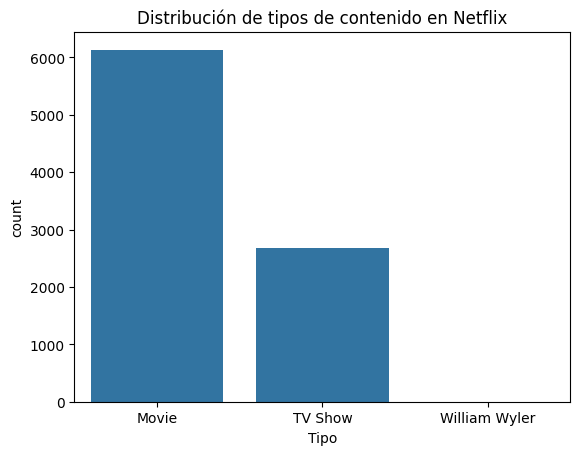

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de tipos de contenido (película vs serie)
sns.countplot(x="Tipo", data=df)
plt.title("Distribución de tipos de contenido en Netflix")
plt.show()


## Distibución de Clasificaciones

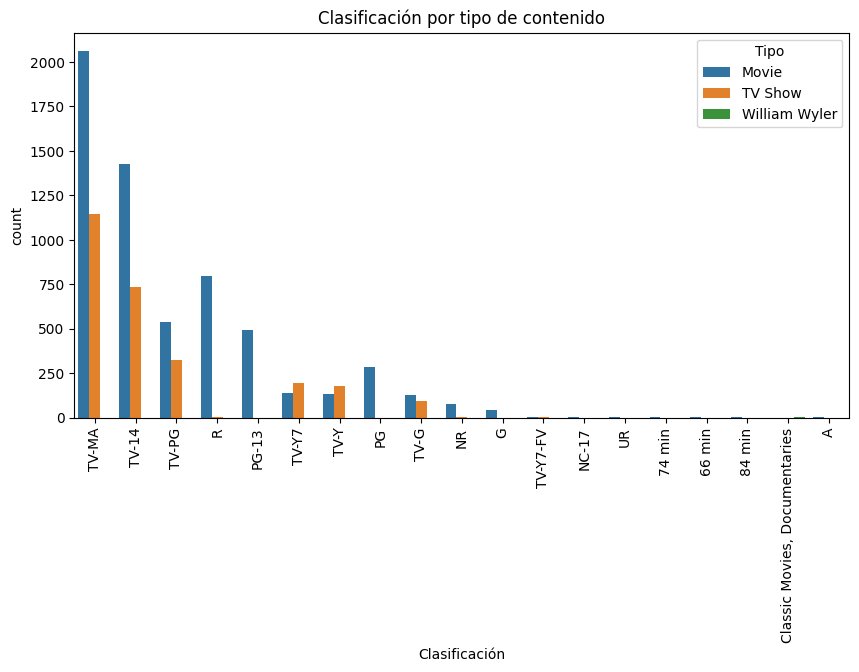

In [9]:

# Distribución de clasificaciones por tipo de contenido
plt.figure(figsize=(10,5))
sns.countplot(x="Clasificación", hue="Tipo", data=df, order=df["Clasificación"].value_counts().index)
plt.title("Clasificación por tipo de contenido")
plt.xticks(rotation=90)
plt.show()


## Analisis por decada

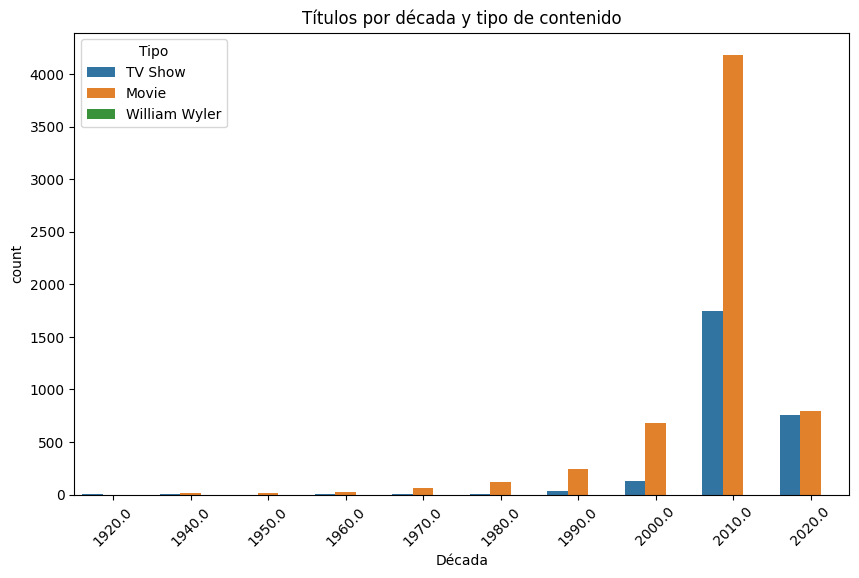

In [10]:
plt.figure(figsize=(10,6))

# Crear columna con la década
df["Año de publicación"] = pd.to_numeric(df["Año de publicación"], errors='coerce')
df["Década"] = (df["Año de publicación"] // 10) * 10

sns.countplot(x="Década", hue="Tipo", data=df, order=sorted(df["Década"].dropna().unique()))

plt.title("Títulos por década y tipo de contenido")
plt.xticks(rotation=45)
plt.show()

## Duración de peliculas

Además de analizar la cantidad de estrenos por año, resulta interesante observar cómo varió la duración de las películas a lo largo del tiempo.

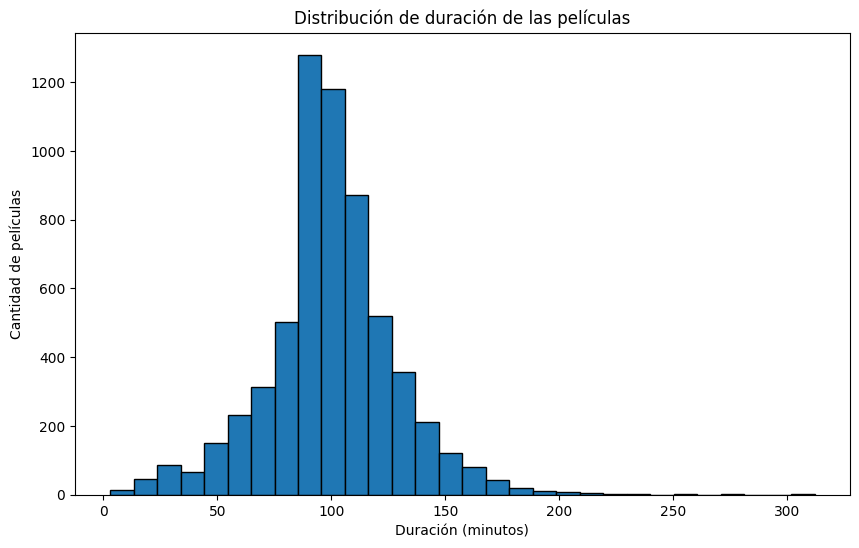

In [11]:
plt.figure(figsize=(10,6))

# Filtramos solo películas (porque las series tienen "temporadas" en la duración)
peliculas = df[df["Tipo"] == "Movie"].copy()

# Convertimos la columna Duración a número (ej: "90 min" → 90)
peliculas["Duración_num"] = peliculas["Duración"].str.replace(" min","", regex=False)
peliculas["Duración_num"] = pd.to_numeric(peliculas["Duración_num"], errors="coerce")

# Histograma
plt.hist(peliculas["Duración_num"].dropna(), bins=30, edgecolor="black")
plt.title("Distribución de duración de las películas")
plt.xlabel("Duración (minutos)")
plt.ylabel("Cantidad de películas")
plt.show()


## Proporción de Peliculas y Series

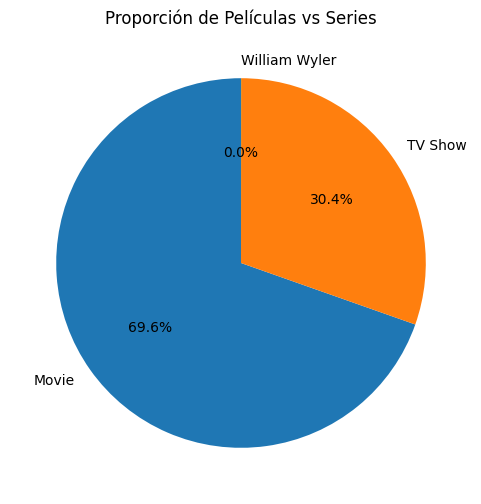

In [12]:
plt.figure(figsize=(6,6))

conteo = df["Tipo"].value_counts()

plt.pie(conteo, labels=conteo.index, autopct="%1.1f%%", startangle=90)
plt.title("Proporción de Películas vs Series")
plt.show()


# Segunda Entrega Comisión 84930 Florencia Lascombes Migliardi

**Feature selection, modelado y evaluación**

Esta es la segunda entrega que forma parte del trabajo final: selección de features, entrenamiento de un modelo de clasificación (Movie vs TV Show), validación y conclusiones.

In [15]:
# 1. Imports
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesamiento y modelos
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# selección de features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE

# modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Cargar dataset
df = pd.read_excel("/content/sample_data/Dataset Netflix.xlsx")
df.head()


,show_id,Tipo,Titulo,Director,Reparto,Pais,Fecha que se agrego,Año de publicación,Clasificación,Duración,Género,Descripción
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
# Copia para trabajar
data = df.copy()

# Convertir Año numérico
data["Año de publicación"] = pd.to_numeric(data["Año de publicación"], errors="coerce")

# Duración: separar "X min" o "Y Seasons"
# Creamos Duración_num para películas (minutos) y Seasons_num para series
def extract_duration(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    if "min" in x:
        try:
            return int(x.replace(" min",""))
        except:
            return np.nan
    return np.nan

def extract_seasons(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    if "Season" in x:
        try:
            return int(x.split()[0])
        except:
            return np.nan
    return np.nan

data["Duración_num"] = data["Duración"].apply(extract_duration)
data["Seasons_num"] = data["Duración"].apply(extract_seasons)

# Feature: número de géneros (las celdas suelen tener comas)
data["num_genres"] = data["Género"].fillna("").apply(lambda s: len([g for g in s.split(",") if g.strip()!=""]))

# Feature: longitud de la descripción (proxy de complejidad)
data["desc_len"] = data["Descripción "].fillna("").apply(len)

# Feature: cuenta de actores en "Reparto"
data["cast_count"] = data["Reparto"].fillna("").apply(lambda s: len([p for p in s.split(",") if p.strip()!=""]))

# Feature: director presente (binario)
data["director_missing"] = data["Director"].isna().astype(int)

# Limpiar País y dejar top N países, el resto como "Other"
data["Pais"] = data["Pais"].fillna("Unknown")
top_countries = data["Pais"].value_counts().head(10).index.tolist()
data["Pais_top"] = data["Pais"].apply(lambda x: x if x in top_countries else "Other")

# Target: Tipo (Movie / TV Show) -> label encode
data = data[~data["Tipo"].isna()]  # remover filas sin target
le = LabelEncoder()
data["target"] = le.fit_transform(data["Tipo"])  # Movie=0, TV Show=1 (según orden)
le.classes_


array(['Movie', 'TV Show', 'William Wyler'], dtype=object)

In [18]:
# Seleccionamos columnas potenciales (numéricas y categóricas que convertiremos)
num_feats = ["Año de publicación","Duración_num","Seasons_num","num_genres","desc_len","cast_count","director_missing"]
cat_feats = ["Pais_top"]

# Imputadores y transformadores
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_feats),
    ("cat", cat_transformer, cat_feats)
], remainder="drop")

# Probar preprocesamiento y obtener matriz X
X = preprocessor.fit_transform(data)
# obtener nombres de las columnas resultantes (para interpretar importancias)
ohe_cols = preprocessor.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(cat_feats)
feature_names = num_feats + list(ohe_cols)
len(feature_names), feature_names[:10]

(18,
 ['Año de publicación',
  'Duración_num',
  'Seasons_num',
  'num_genres',
  'desc_len',
  'cast_count',
  'director_missing',
  'Pais_top_Canada',
  'Pais_top_France',
  'Pais_top_India'])

In [19]:
y = data["target"].values

# Usamos SelectKBest para quedarse con top k features
k = min(10, X.shape[1])  # elegir hasta 10 o menos si hay menos
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(X, y)
mask = selector.get_support()  # boolean mask
selected_features = [feature_names[i] for i, m in enumerate(mask) if m]
scores = selector.scores_[mask]

print("Top features (SelectKBest - mutual_info):")
for f, s in zip(selected_features, scores):
    print(f"{f}: {s:.4f}")


Top features (SelectKBest - mutual_info):
Año de publicación: 0.0249
Duración_num: 0.5569
Seasons_num: 0.1284
num_genres: 0.0063
cast_count: 0.0267
director_missing: 0.4273
Pais_top_India: 0.0159
Pais_top_South Korea: 0.0103
Pais_top_United Kingdom: 0.0059
Pais_top_Unknown: 0.0101


## Matriz de confusión

In [20]:
# Volvemos a entrenar un RandomForest sobre los datos preprocesados (sin selección)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

# RFE necesita una matriz base. Probamos seleccionar 8 features
rfe = RFE(estimator=rf, n_features_to_select=min(8, X.shape[1]), step=1)
rfe.fit(X, y)
rfe_mask = rfe.get_support()
rfe_features = [feature_names[i] for i, m in enumerate(rfe_mask) if m]

print("Top features (RFE RandomForest):")
for f in rfe_features:
    print("-", f)


Top features (RFE RandomForest):
- Año de publicación
- Duración_num
- Seasons_num
- num_genres
- desc_len
- cast_count
- director_missing
- Pais_top_South Korea


Accuracy: 0.989
Precision: 0.974
Recall: 0.989
F1: 0.981
ROC AUC: 1.000


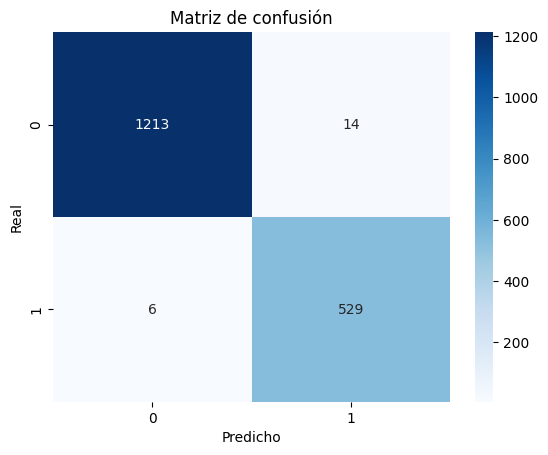

              precision    recall  f1-score   support

       Movie       1.00      0.99      0.99      1227
     TV Show       0.97      0.99      0.98       535

    accuracy                           0.99      1762
   macro avg       0.98      0.99      0.99      1762
weighted avg       0.99      0.99      0.99      1762



In [22]:
# Elegir indices de features a usar
if len(rfe_features) > 0:
    use_mask = rfe_mask
else:
    use_mask = np.ones(len(feature_names), dtype=bool)

X_sel = X[:, use_mask]

# Eliminar la fila con el tipo "William Wyler" antes de dividir los datos.
# La estratificación requiere al menos dos muestras por clase.
# Encontrar el índice de la clase problemática.
problematic_class_index = le.transform(['William Wyler'])[0]

# Filtrar la fila con la clase problemática.
valid_indices = y != problematic_class_index
X_sel_filtered = X_sel[valid_indices]
y_filtered = y[valid_indices]

# train/test split estratificado
X_train, X_test, y_train, y_test = train_test_split(X_sel_filtered, y_filtered, test_size=0.2, stratify=y_filtered, random_state=42)

# Entrenar RandomForest (pipeline ya hizo el preprocesamiento arriba)
clf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1: {f1:.3f}")
print(f"ROC AUC: {roc:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

# Reporte detallado
print(classification_report(y_test, y_pred, target_names=le.classes_[le.classes_ != 'William Wyler']))

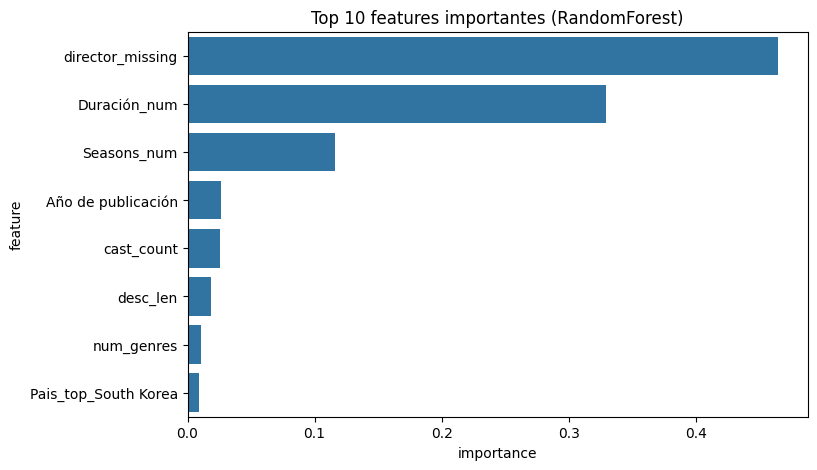

In [23]:
# obtener importancias y mapear a nombres
importances = clf.feature_importances_
selected_names = [n for i,n in enumerate(feature_names) if use_mask[i]]
feat_imp = pd.DataFrame({"feature": selected_names, "importance": importances}).sort_values("importance", ascending=False)
feat_imp.head(10)

# plot
plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp.head(10), x="importance", y="feature")
plt.title("Top 10 features importantes (RandomForest)")
plt.show()


## Mayores países con titulos

In [25]:
# valores faltantes por columna
data_orig = df.copy()
print(data_orig.isnull().sum().sort_values(ascending=False).head(20))


Director               2636
Pais                    833
Reparto                 826
Fecha que se agrego      12
Clasificación             6
Duración                  5
Descripción               3
Género                    3
Titulo                    2
Año de publicación        2
Tipo                      1
show_id                   0
dtype: int64


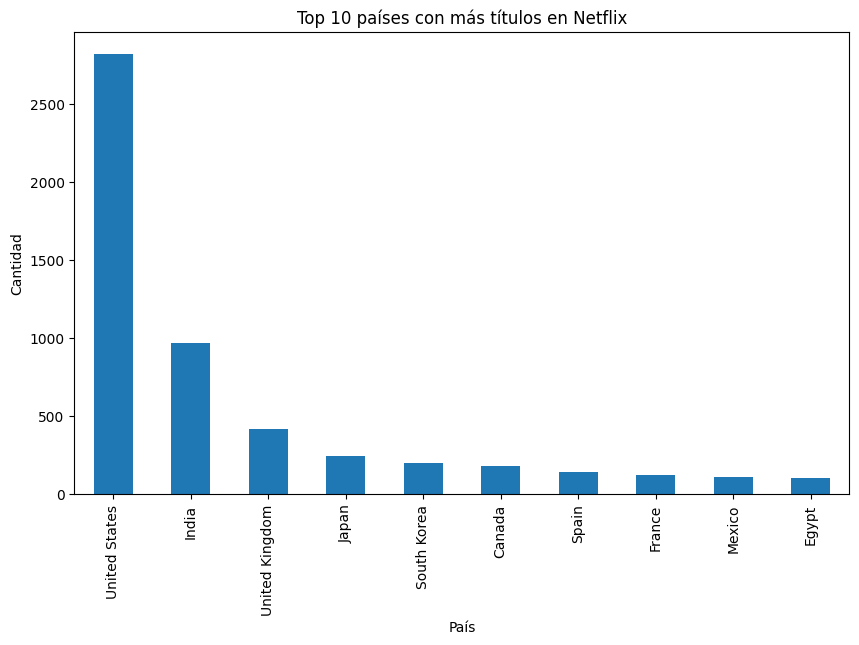

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['Pais'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 países con más títulos en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad")
plt.show()

## Heatmap según país y por décadas

Si bien algunos países concentran la mayor parte del catálogo, es relevante analizar cómo ha sido su aporte a lo largo del tiempo. Para ello, se muestra un mapa de calor que refleja la cantidad de títulos lanzados por país y año.

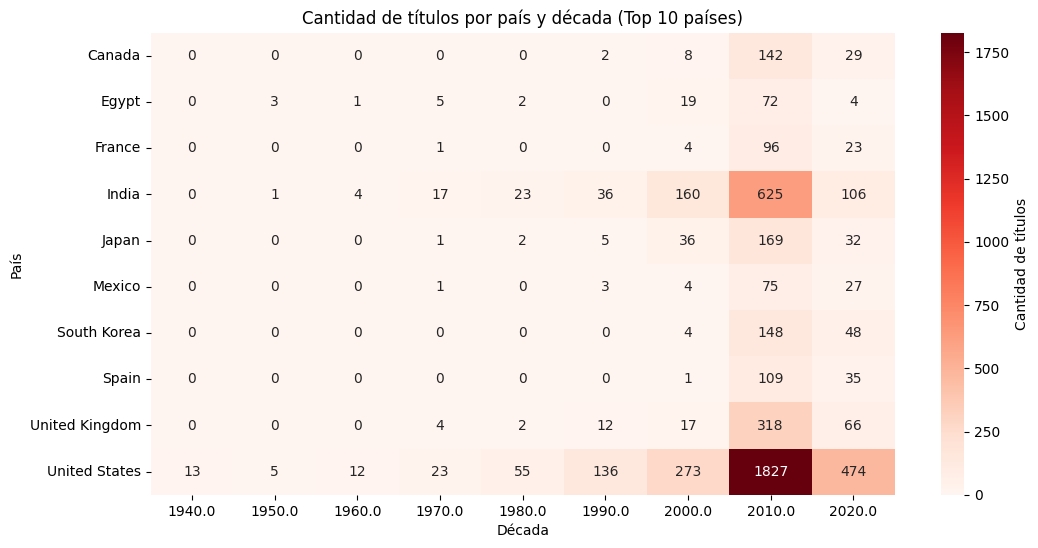

In [35]:
# Crear columna de década
df['Década'] = (pd.to_numeric(df['Año de publicación'], errors='coerce') // 10) * 10

# Agrupar por país y década
country_decade = df.groupby(['Pais', 'Década']).size().reset_index(name='count')

# Filtrar top 10 países
top_countries = df['Pais'].value_counts().head(10).index
country_decade = country_decade[country_decade['Pais'].isin(top_countries)]

# Pivot para el heatmap
pivot = country_decade.pivot(index='Pais', columns='Década', values='count').fillna(0)

# Graficar heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Reds", cbar_kws={'label': 'Cantidad de títulos'}, annot=True, fmt='.0f')
plt.title("Cantidad de títulos por país y década (Top 10 países)")
plt.xlabel("Década")
plt.ylabel("País")
plt.show()


## Top 10 Géneros

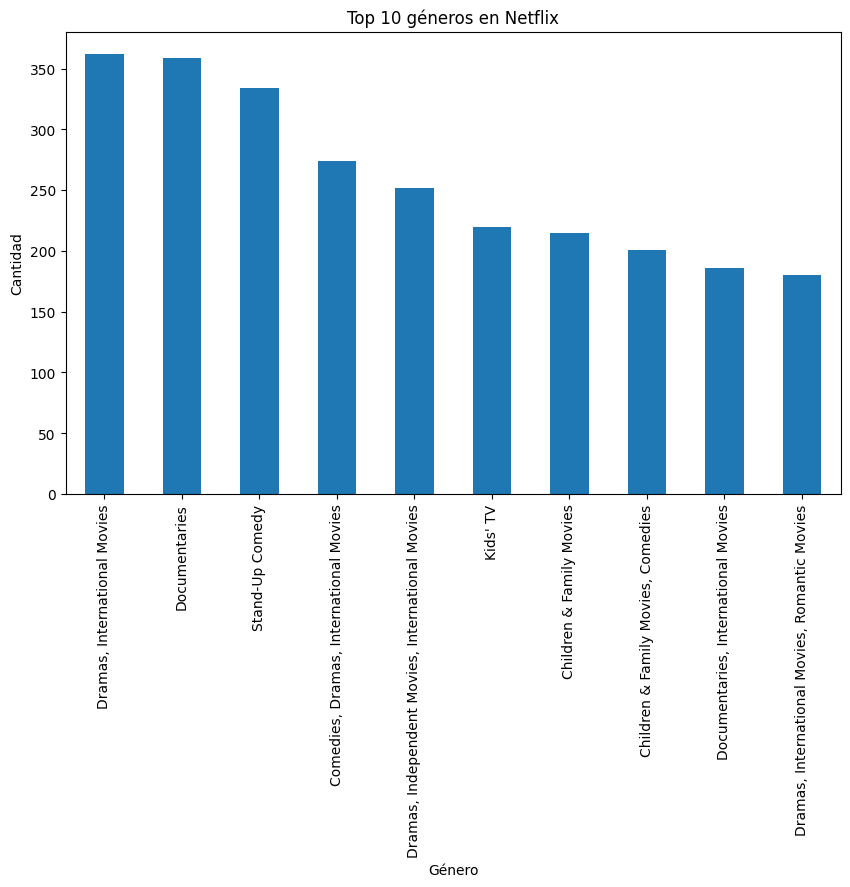

In [32]:
plt.figure(figsize=(10,6))
df['Género'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 géneros en Netflix")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

## Nube de palabras de los géneros mas frecuentes

Para complementar el análisis, se presenta una nube de palabras que permite visualizar de manera gráfica los géneros más frecuentes en el catálogo de Netflix.

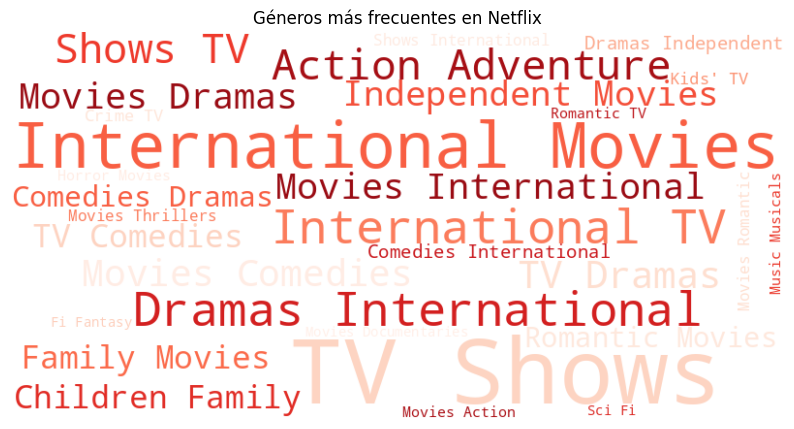

In [37]:
from wordcloud import WordCloud

text = " ".join(df['Género'].dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=30,
    colormap="Reds"
).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Géneros más frecuentes en Netflix")
plt.show()


## Conclusiones

- **Predominio de películas:** Tal como se planteaba en las hipótesis, la mayoría del contenido disponible en el catálogo de Netflix corresponde a películas. Esto confirma que, aunque las series han ganado popularidad, la plataforma sigue sosteniendo una fuerte base en largometrajes.

- **Crecimiento en los últimos años:** El análisis temporal muestra que en la última década se produjo un incremento significativo en la cantidad de títulos incorporados, lo cual coincide con la expansión Netflix

- **Clasificación etaria predominante:** Las clasificaciones más frecuentes corresponden a público adulto-joven (como *TV-MA* o *PG-13*), lo que refleja la estrategia de Netflix de apuntar a audiencias que buscan contenidos más variados y maduros, sin dejar de lado las opciones familiares.

- **Concentración geográfica:** Estados Unidos concentra la mayor producción de títulos, seguido por algunos países con industrias audiovisuales relevantes (como India y Reino Unido). Esto revela una centralización, pero también se observa una creciente diversidad con más países participando en el catálogo.

- **Duración y tipo de contenido:** Se observa que las películas mantienen una duración más estable, mientras que las series presentan mayor variabilidad en número de temporadas y episodios, lo que responde a las dinámicas narrativas de cada formato.

---

En conjunto, los resultados muestran que Netflix ha pasado de ser un catálogo con fuerte presencia de producciones estadounidenses a un servicio cada vez más globalizado y diverso, aunque todavía con cierta concentración en países líderes de la industria. La tendencia a ampliar la oferta en los últimos años confirma la apuesta por consolidarse como principal plataforma de streaming a nivel mundial.
